![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Introduction to Keras using a TensorFlow 2.0**
### **Training a Simple CNN on the MNIST Dataset - Handwrittent Digits**

---



---



In this lesson, we use **Keras with a TensorFlow 2.0** Backend to to create a **simple Convolutional Neural Network model** in PyTorch and train it to **recognize handwritten digits in the MNIST dataset.**
1. Loading our MNIST dataset
2. Inspecting our dataset 
3. Visualizing our image dataset
5. Preprocessing our dataset
6. Building our Model
7. Training our Model
8. Plotting our training logs
9. Saving and Loading our Model
10. Testing our model on test data

## **1. Loading our Data**

There are built in datasets from ```tensorflow.keras.datasets``` to load our data. We use the ```mnist.load_data()``` function.

Returns: **2 tuples**
- x_train, x_test: uint8 array of RGB image data with shape (num_samples, 3, 32, 32) or (num_samples, 32, 32, 3) based on the image_data_format backend setting of either channels_first or channels_last respectively.
- y_train, y_test: uint8 array of category labels (integers in range 0-9) with shape (num_samples, 1).

- More info on available datases at https://keras.io/datasets/

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.python.client import device_lib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.models import load_model
import cv2 
import numpy as np
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### **A quick check to see if we're using the GPU**

In [3]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 378772315336185732
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11306945707100458422
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## **2. Inspecting our dataset**

In [4]:
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


## **3. Visualizing our image dataset**

Let's take a look at some of images in this dataset
- Using OpenCV
- Using Matplotlib

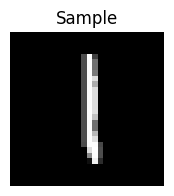

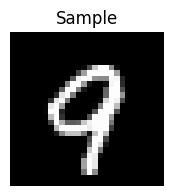

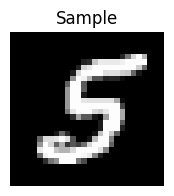

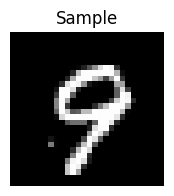

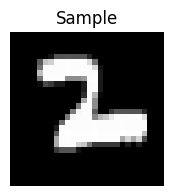

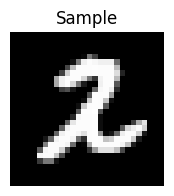

In [5]:
def imshow(title, image = None, size = 6):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()


for i in range(0,6):
  random_num = np.random.randint(0, len(x_train))
  img = x_train[random_num]
  imshow("Sample", img, size = 2)

### **Let's do the same thing but using matplotlib to plot 6 images**

<Figure size 640x480 with 0 Axes>

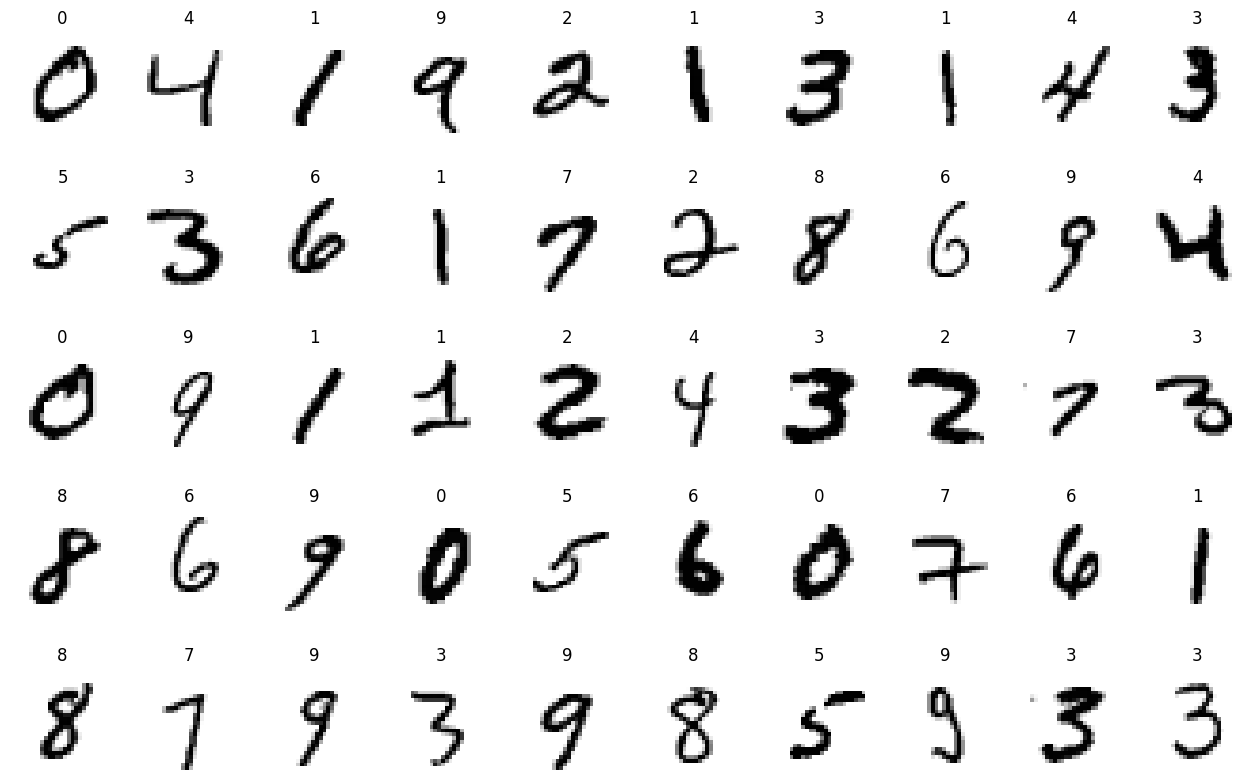

In [6]:
figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50 

for index in range(1, num_of_images+1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

## **4. Preprocessing our dataset** 

Before passing our data to our CNN for training, we need to prepare it firstly. This entials:
1. Reshaping our data by adding a 4th Dimension
2. Changing our datatype from uint8 to float32
3. Normalizing our data to values between 0 and 1
4. One hot encoding

In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
print(img_rows, img_cols)

28 28


#### **One Hot Encode Our Labels (Y)**

We can easily implement this transformm using ```to_categorical``` from ``` tensorflow.keras.utils```

In [9]:
# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


#### **Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## **5. Building Our Model**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x3
- We then downsample our data to 2x2
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- Then we connect our 128 outputs to another FC/Dense layer that outputs to the 10 categorical units

In [11]:
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.001)
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.001), metrics=['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

## **6. Training our Model**
- Our preprocessed data is used as the input
- We set the batch size to 128 (or any number ranging from 8 to 256 is good)
- We set the number of epochs to 2, this is just for this tutorial purpose, but a value for at least 10 should be used
- We store our model's training results for plotting in future
- We then use Kera's molel.evaluate function to output the model's final performance. Here we are examing Test Loss and Test Accuracy

In [12]:
batch_size = 128
epochs = 25

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# We obtain our accuracy score using the evalute function
# Score holds two values, our Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 17s 11ms/step - loss: 2.1783 - accuracy: 0.4856 - val_loss: 1.9705 - val_accuracy: 0.7061
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 1.4408 - accuracy: 0.7500 - val_loss: 0.8403 - val_accuracy: 0.8265
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6275 - accuracy: 0.8463 - val_loss: 0.4713 - val_accuracy: 0.8829
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.4402 - accuracy: 0.8798 - val_loss: 0.3815 - val_accuracy: 0.8965
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3781 - accuracy: 0.8932 - val_loss: 0.3394 - val_accuracy: 0.9072
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3441 - accuracy: 0.9014 - val_loss: 0.3126 - val_accuracy: 0.9144
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3213 - accuracy: 0.9076 - val_loss: 0.2932 - val_accuracy: 0.9177
Epo

## **7. Ploting our Loss and Accuracy Charts**

In [13]:
history_dict = history.history
history_dict

{'loss': [2.1782779693603516,
  1.440827488899231,
  0.6275038123130798,
  0.4401842951774597,
  0.37808340787887573,
  0.3441144526004791,
  0.3212718963623047,
  0.3037041127681732,
  0.28947848081588745,
  0.2772350013256073,
  0.2667406499385834,
  0.25727760791778564,
  0.24878087639808655,
  0.24088789522647858,
  0.23326019942760468,
  0.22599640488624573,
  0.21922600269317627,
  0.21271662414073944,
  0.207090362906456,
  0.20121750235557556,
  0.19602946937084198,
  0.19091813266277313,
  0.18627287447452545,
  0.18172261118888855,
  0.177361860871315],
 'accuracy': [0.4855833351612091,
  0.7500166893005371,
  0.8463166952133179,
  0.8798166513442993,
  0.8932499885559082,
  0.9013833403587341,
  0.9076166749000549,
  0.911716639995575,
  0.9158499836921692,
  0.9191499948501587,
  0.9228000044822693,
  0.9254000186920166,
  0.9276833534240723,
  0.930649995803833,
  0.932449996471405,
  0.934416651725769,
  0.9368000030517578,
  0.9387000203132629,
  0.9401000142097473,
  0.

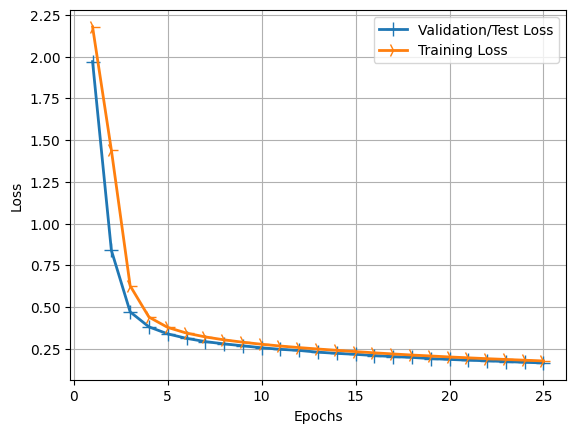

In [14]:
# Use the History object we created to get our saved performance results
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values)+1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

#### **Our Accuracy Charts**

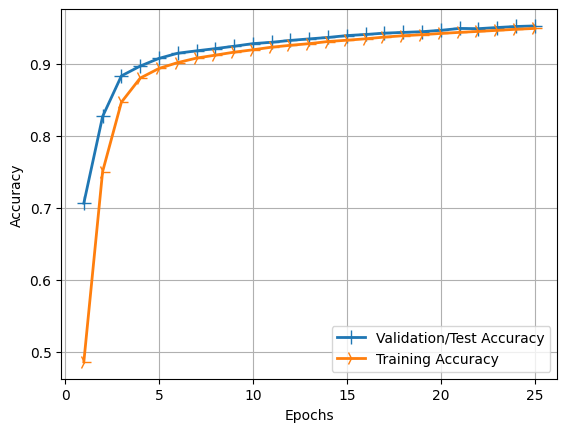

In [15]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **8. Saving and Loadng our Model**

**Saving our Model is simple, just use:**

 ```model.save("model_file_name.h5")```

In [16]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


**Loading our Saved Model is also simple, just use:**

```load_model(model_file_name.h5)```

In [17]:
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

##  **9. Getting Predictions from our sample Test Data**

**Predicting all test data**

In [18]:
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 1s 2ms/step
Completed.

[7 2 1 ... 4 5 6]
<class 'numpy.ndarray'>
10000


**Predicting an individual test image**

In [19]:
# Get the first image by index 0 of x_test and show it's shape
input_im = x_test[0]
print(input_im.shape)

# We need to add a 4th dimension to the first axis
input_im = input_im.reshape(1,28,28,1) 
print(input_im.shape)

# We now get the predictions for that single image
pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 74ms/step
[7]
<class 'numpy.ndarray'>
1


### **Now let's do something fancy, let's put the predicted label on an image with the test data image**

1/1 [==============================] - 0s 66ms/step


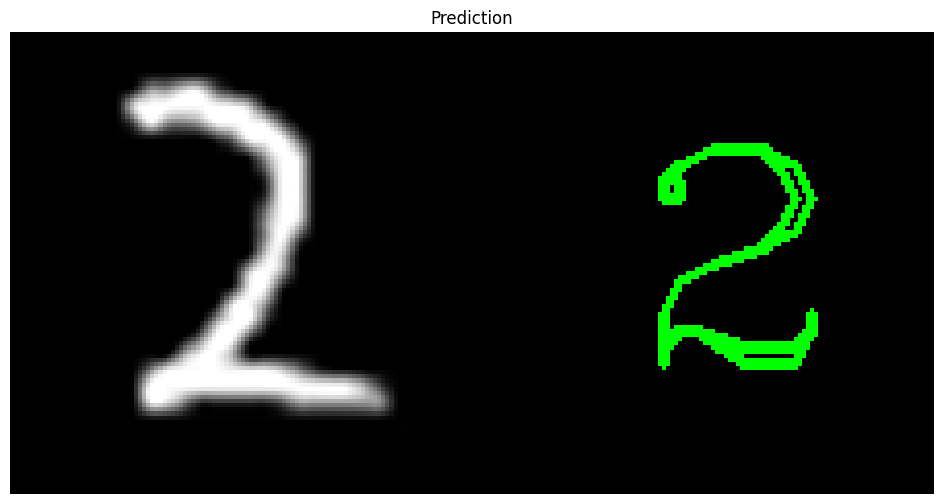

1/1 [==============================] - 0s 19ms/step


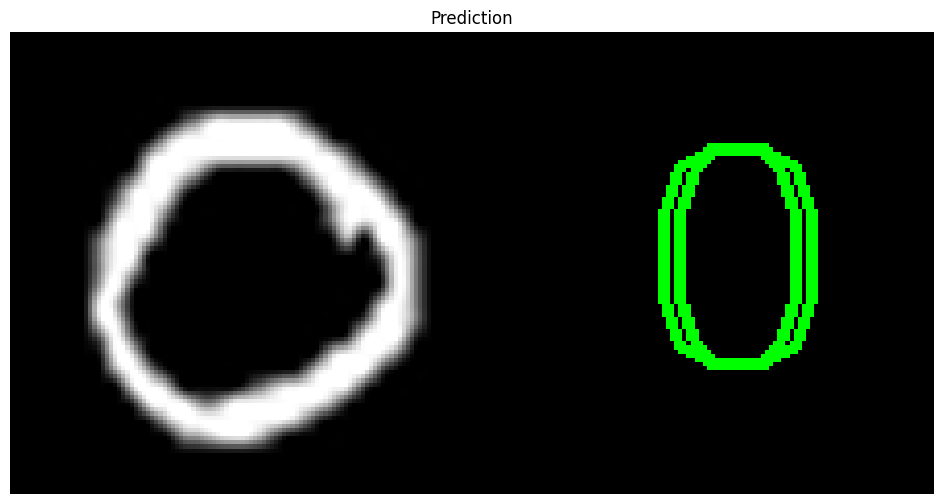

1/1 [==============================] - 0s 18ms/step


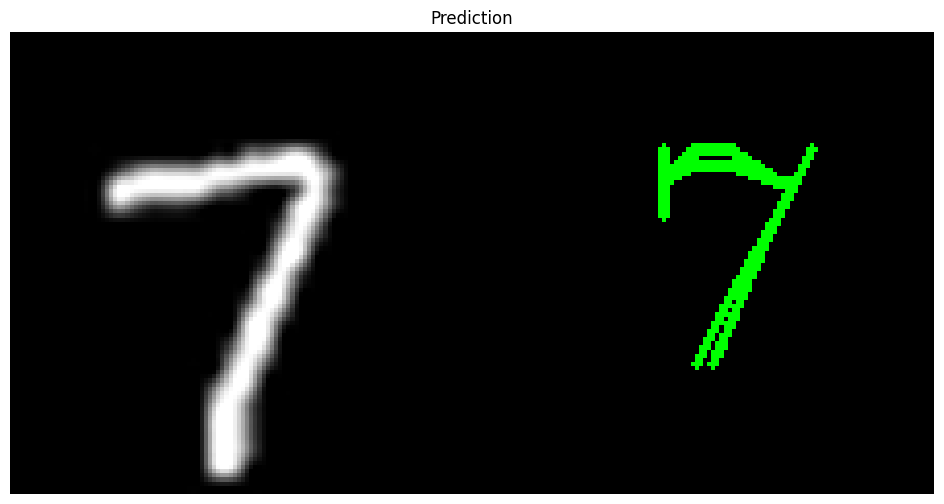

1/1 [==============================] - 0s 21ms/step


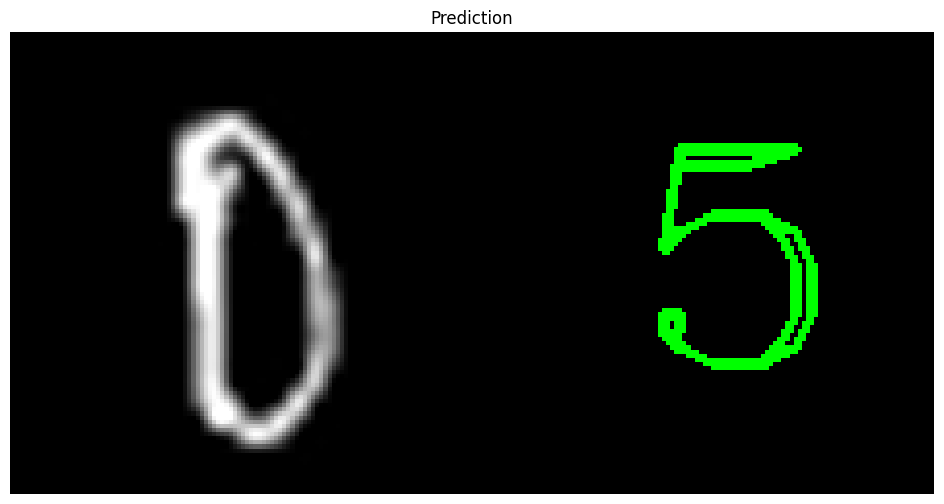

1/1 [==============================] - 0s 18ms/step


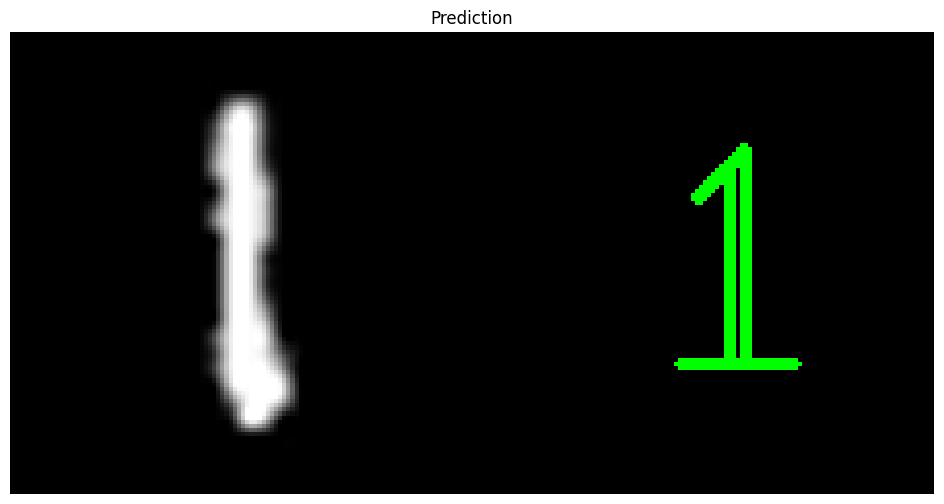

1/1 [==============================] - 0s 17ms/step


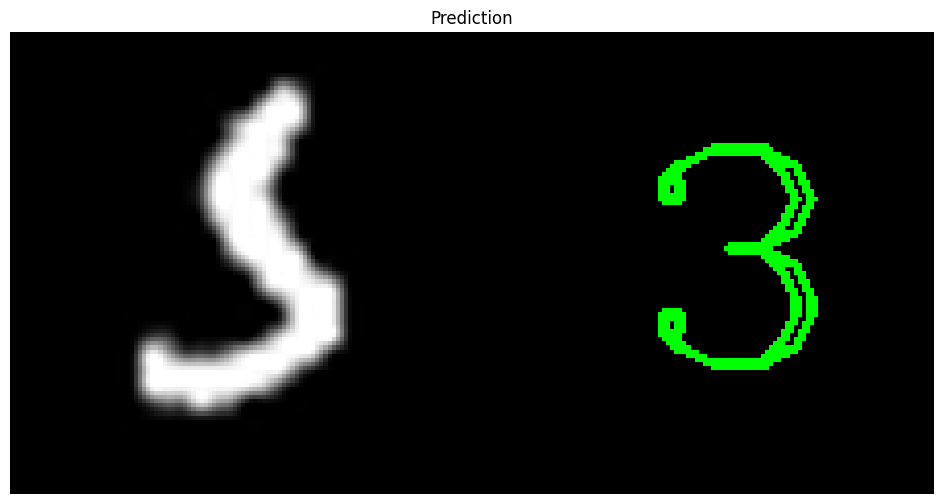

1/1 [==============================] - 0s 18ms/step


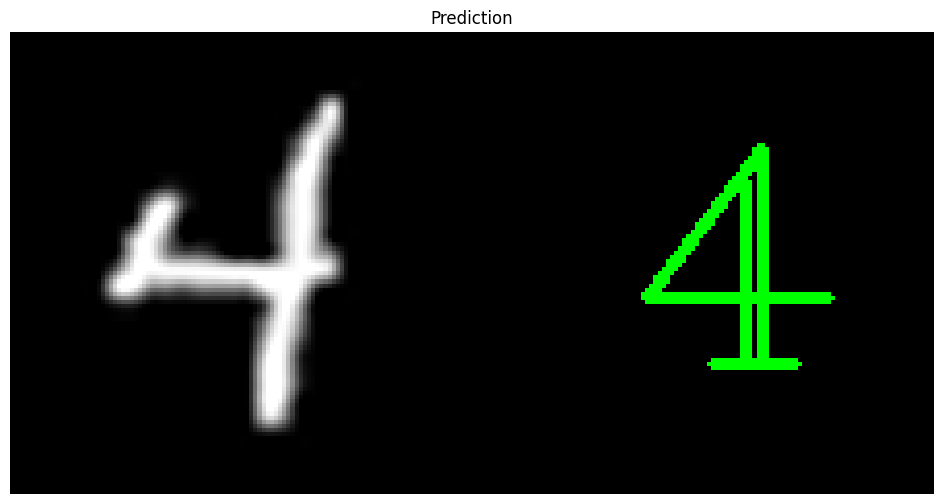

1/1 [==============================] - 0s 19ms/step


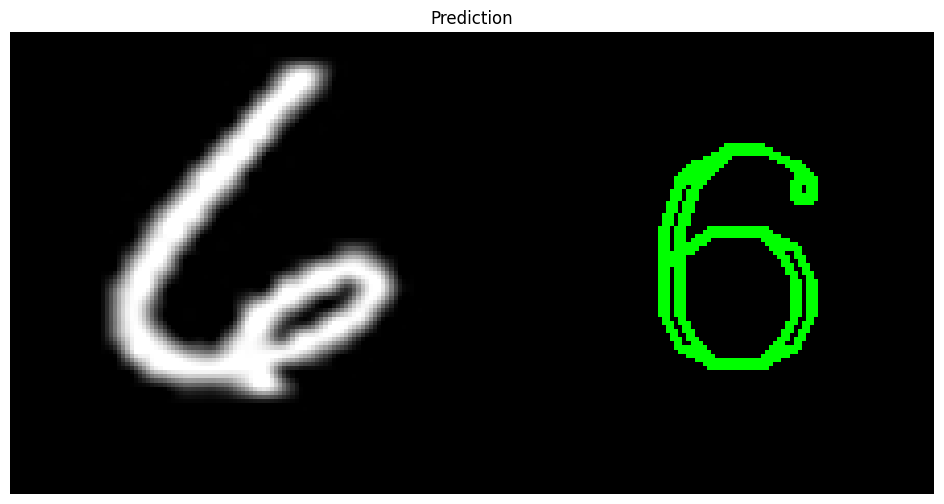

1/1 [==============================] - 0s 17ms/step


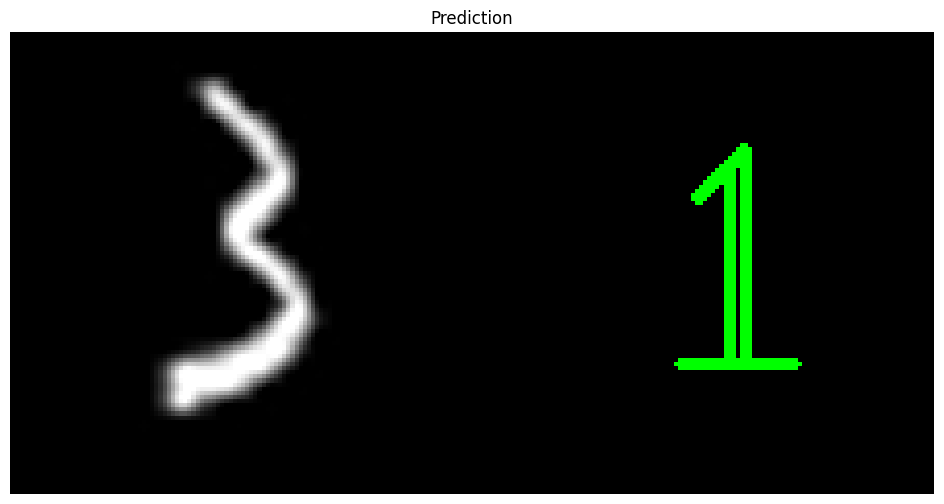

1/1 [==============================] - 0s 19ms/step


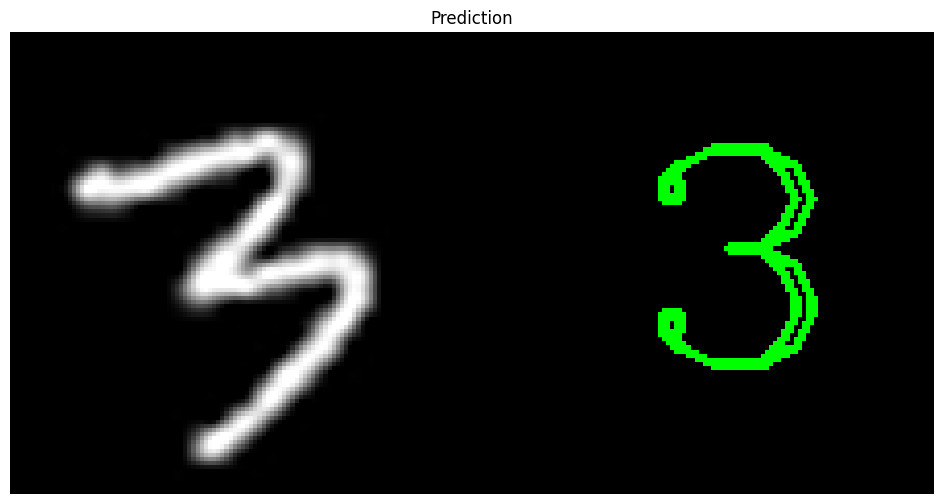

In [20]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    '''Function that places the predicted class next to the original image'''
    # Create our black background
    BLACK = [0,0,0]
    # Expanded our original image to the right to create space to place our predicted class text
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # convert our grayscale image to color
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Put our predicted class text in our expanded image
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    # Get a random data image from our test dataset 
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Create a larger re-sized image to hold our text and allow for a larger display
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Reshape our data so that we can input it (forward propagate) it to our network
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction, use [0] to access the value in the numpy array since it's stored as an array
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Put the label on the image of our test data sample
    draw_test("Prediction", res,  np.uint8(imageL)) 